<a href="https://colab.research.google.com/github/jinliucrystal/intro-to-text-analysis-SIPA-S23-final-project/blob/main/NER_finalproject_JinLiu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction**
**Research Question:**

For my final project, my research goal is to collect news data in text format from News API and structure this news text data related to Amazon for database creation and data analysis. Specifically, my research question is: 'What are the predominant entities and labels associated with Amazon in news articles, and what can these features reveal about public perception regarding the topics that usually correspond with Amazon-related news articles?' My research question seeks to explore the contextual relationships between different entities and themes in the news mentioning Amazon, providing a comprehensive understanding of how Amazon is represented in the media landscape and which topics are related.

**Hypothesis:**

My research hypothesis posits that a systematic analysis of news articles can unveil crucial trends, topics, and entities associated with Amazon, offering valuable marketing insights for businesses and the public. Specifically, this analysis anticipates the consistent emergence of certain entities and themes in Amazon-related news, thereby reflecting the company's market strategies, public relations efforts, and societal impact.

**Why this project is important to study:**

The aims of this research project are twofold: first, to develop an Advanced Database System capable of transforming unstructured news text data into a structured format, focusing on news content explicitly mentioning Amazon. Second, to extract key elements from news data related to Amazon, utilizing entity types that are likely to yield insightful information about Amazon's activities and the market environment.

The utilization of Named Entity Recognition (NER) techniques for the analysis of Amazon-related news is supported by significant advancements and applications of NER in the eCommerce domain, as highlighted in the article 'An End-to-End Solution for Named Entity Recognition in eCommerce Search' (Cheng et al., 2021). This study demonstrates NER's critical role in enhancing search query understanding, particularly in eCommerce settings, where identifying key entities such as brands and product types is crucial for retrieving relevant products and improving the user experience.

Another article, 'Building a Large-Scale Deep Learning System for Entity Recognition in E-Commerce Search' (Wen, Vasthimal, Lu, Wang, & Guo, 2019), underscores the fundamental role of NER, or Item Aspect Recognition, in the e-commerce marketplace. It emphasizes the importance of accurately structuring listings and identifying item aspects like brand, color, size, and texture, for both sellers and buyers to navigate the marketplace efficiently. In the context of e-commerce search engines, the automatic recognition of item aspects from shopping queries is essential for understanding shopping intent accurately.

These studies align with my research objectives, which aim to deploy advanced NER techniques for extracting news coverage related to Amazon and analyzing related topics to provide deeper insights into prevalent themes in media portrayals of the company. Both studies underscore the value of NER in extracting and understanding complex datasets, a methodology that is directly applicable and highly relevant to my research.

*Import all relevant libraries for collecting data and processing the NER:*

In [ ]:
import spacy
from spacy import displacy
import en_core_web_sm
from collections import Counter
import pandas as pd
pd.options.display.max_rows = 600
pd.options.display.max_colwidth = 400
import glob
from pathlib import Path
import requests
import pprint
from bs4 import BeautifulSoup

# **Methods: describing how you collected and analyzed the data:**

**Code reference:**

For the coding part of my NER project, I primarily referred to the codes provided during the NER Workshop session led by Professor Rebecca Krisel, in addition to seeking sample data visualization codes from ChatGPT.

**Process of data collection:**

In the data collection process, I initiated the collection by establishing a connection to NewsAPI, a reliable source of news articles. To ensure that the dataset would encompass the most recent information, I configured specific parameters targeting news content published within the past year, with a primary focus on articles mentioning 'Amazon.' This careful parameterization effectively narrowed down the search to the most relevant articles.

Subsequently, I executed queries to extract a comprehensive list of URLs representing the identified Amazon-related news articles. These URLs served as essential references to access the actual content of the articles. Employing web scraping techniques, I retrieved the complete textual content from each URL. This involved programmatically accessing the web addresses, parsing the HTML content, and extracting the textual content of the articles.

To facilitate data organization and prepare the dataset for subsequent analysis, each news article mentioning Amazon was meticulously saved as an individual text file. This step established a structured framework where each text file represented a distinct and self-contained unit of information.

Lastly, the gathered data was imported into a structured database system. During this phase, the content from each article was thoughtfully organized into columns, one for each article. This structuring ensured that the data remained accessible and organized, facilitating seamless data manipulation and querying throughout the subsequent phases of the research.

**Process of data analysis using NER:**

I performed Named Entity Recognition (NER) on a collection of text files using the spaCy library. First, I loaded the 'en_core_web_sm' spaCy model and then processed 20 text files from a specified directory. During processing, I identified entities and their associated entity types within the text.

My procedure began by feeding text data from the collected news articles into the SpaCy NER model. This step was crucial for identifying and tagging named entities within each piece of news content. To enhance clarity and utility, each detected entity was annotated with a corresponding label, categorizing it as a person, organization, location, or product. Subsequently, the results underwent a filtering process, allowing for the isolation and examination of entities specifically categorized under relevant types. This focused analysis was pivotal in extracting entities that are most informative about Amazon. These categories included people, organizations, locations, products, and activities, along with the date of the news post. Such selective extraction was instrumental in ensuring that the analysis remained targeted and relevant, thereby providing a clear and comprehensive understanding of how Amazon is portrayed and discussed in various news media, and enabling the extraction of insights that are most pertinent to Amazon’s market environment and corporate activities.

*Load the spaCy language model*

In [ ]:
nlp = en_core_web_sm.load()

*Collect Data: Combining APIs and Web Scraping*

*Install the News API*

In [ ]:
#!pip install newsapi-python

*Store secret key*

In [ ]:
secret= '2e22f3b34a15486f847c3f58d81a9e51'

*Define endpoint*

In [ ]:
url = 'https://newsapi.org/v2/everything?'

*Define query parameters*

In [ ]:
parameters = {
    'q': 'Amazon',
    'searchIn': 'title',
    'pageSize': 20,
    'language': 'en',
    'apiKey': secret  # Replace 'secret' with your actual API key variable or string
}


*Make data request*

In [ ]:
response = requests.get(url, params=parameters)

*Visualize JSON results*

In [ ]:
response_json = response.json()
pprint.pprint(response_json)

{'articles': [{'author': 'Amy Skorheim',
               'content': 'With Cyber Monday deals have come big savings on '
                          'all things Amazon. If youve been looking to get a '
                          'new Echo speaker for your home office or pick up a '
                          'Kindle as a holiday gift, nows a great time to sh… '
                          '[+18389 chars]',
               'description': 'With Cyber Monday deals have come big savings '
                              'on all things Amazon. If you’ve been looking to '
                              'get a new Echo speaker for your home office or '
                              'pick up a Kindle as a holiday gift, now’s a '
                              'great time to shop for all of Amazon’s gadgets '
                              'and gear. For 2023, we’re s…',
               'publishedAt': '2023-11-27T14:45:32Z',
               'source': {'id': 'engadget', 'name': 'Engadget'},
               'titl

*Check what keys exist in JSON data*

In [ ]:
response_json.keys()

dict_keys(['status', 'totalResults', 'articles'])

*See the data stored in each key*

In [ ]:
print(response_json['status'])
print(response_json['totalResults'])
print(response_json['articles'])

ok
7123
[{'source': {'id': 'engadget', 'name': 'Engadget'}, 'author': 'Amy Skorheim', 'title': 'The 35 best Amazon Cyber Monday deals you can get', 'description': 'With Cyber Monday deals have come big savings on all things Amazon. If you’ve been looking to get a new Echo speaker for your home office or pick up a Kindle as a holiday gift, now’s a great time to shop for all of Amazon’s gadgets and gear. For 2023, we’re s…', 'url': 'https://www.engadget.com/the-35-best-amazon-cyber-monday-deals-you-can-get-144532716.html', 'urlToImage': 'https://s.yimg.com/ny/api/res/1.2/N_3sUu5DI18HzrnMcSMu.w--/YXBwaWQ9aGlnaGxhbmRlcjt3PTEyMDA7aD02NjA-/https://s.yimg.com/os/creatr-uploaded-images/2023-11/82dacd10-8d33-11ee-bd8f-552ae8d0cc68', 'publishedAt': '2023-11-27T14:45:32Z', 'content': 'With Cyber Monday deals have come big savings on all things Amazon. If youve been looking to get a new Echo speaker for your home office or pick up a Kindle as a holiday gift, nows a great time to sh… [+18389 chars]

*Check the datatype for each key*

In [ ]:
print(type(response_json['status']))
print(type(response_json['totalResults']))
print(type(response_json['articles']))

<class 'str'>
<class 'int'>
<class 'list'>


*Make sure the list reads as a dictionary*

In [ ]:
type(response_json['articles'][0])

dict

*Convert the JSON key into a Pandas Dataframe*

In [ ]:
df_articles = pd.DataFrame(response_json['articles'])
df_articles

,source,author,title,description,url,urlToImage,publishedAt,content
0,"{'id': 'engadget', 'name': 'Engadget'}",Amy Skorheim,The 35 best Amazon Cyber Monday deals you can get,"With Cyber Monday deals have come big savings on all things Amazon. If you’ve been looking to get a new Echo speaker for your home office or pick up a Kindle as a holiday gift, now’s a great time to shop for all of Amazon’s gadgets and gear. For 2023, we’re s…",https://www.engadget.com/the-35-best-amazon-cyber-monday-deals-you-can-get-144532716.html,https://s.yimg.com/ny/api/res/1.2/N_3sUu5DI18HzrnMcSMu.w--/YXBwaWQ9aGlnaGxhbmRlcjt3PTEyMDA7aD02NjA-/https://s.yimg.com/os/creatr-uploaded-images/2023-11/82dacd10-8d33-11ee-bd8f-552ae8d0cc68,2023-11-27T14:45:32Z,"With Cyber Monday deals have come big savings on all things Amazon. If youve been looking to get a new Echo speaker for your home office or pick up a Kindle as a holiday gift, nows a great time to sh… [+18389 chars]"
1,"{'id': None, 'name': 'Yahoo Entertainment'}",Kris Holt,Amazon now has its own AI image generator,Amazon has hopped on the same bandwagon on which many major tech companies have hitched a ride this year by debuting its own image generator. AWS customers can now check out a preview of Titan Image Generator on the Bedrock console. They can either enter a te…,https://consent.yahoo.com/v2/collectConsent?sessionId=1_cc-session_591afbb7-4100-4c60-a404-2ddba2185452,None,2023-11-29T20:30:25Z,"Si vous cliquez sur « Tout accepter », nos partenaires (y compris 239 qui font partie du Cadre de transparence et de consentement dIAB) et nous utiliserons également des témoins et vos données person… [+982 chars]"
2,"{'id': 'wired', 'name': 'Wired'}",Boone Ashworth,You’ll Be Able Buy Cars on Amazon Next Year,"Plus: Sonos teases a new product, WIRED cover star Simone Giertz has a new invention, and the hackers behind one of the largest ever cyberattacks finally tell their story.",https://www.wired.com/story/hyundai-amazon-car-sales/,"https://media.wired.com/photos/6557e94fa70c4d25e5f31d1f/191:100/w_1280,c_limit/2024-Hyundai-Kona-Electric-Gear.jpg",2023-11-18T14:00:00Z,"Need a new Hyundai? Just ask Alexa.\r\nThis week, the Korean automaker announced it will start working with Amazon to sell some of its vehicles on the gargantuan ecommerce site. The Hyundais purchased … [+3696 chars]"
3,"{'id': 'wired', 'name': 'Wired'}",Caitlin Harrington,The Pilots Delivering Your Amazon Packages Are Ready to Strike,"Pilots for Amazon’s largest air freight provider voted to strike, complaining of low pay and high turnover. If a strike happens in the new year, Amazon deliveries could be impacted.",https://www.wired.com/story/amazon-air-pilots-vote-strike-delays/,"https://media.wired.com/photos/656e74c16f2d6e8417ce8f19/191:100/w_1280,c_limit/Amazon-Pilots-Strike-Business-1235859675.jpg",2023-12-05T12:00:00Z,"ATIs pilots are taking a less antagonistic tone in hopes of bringing Amazon to the negotiating table. What we dont want to do is affect our customers, says Sterling. Weve done a lot to protect our ob… [+2249 chars]"
4,"{'id': 'wired', 'name': 'Wired'}",Louryn Strampe,"80 Best Amazon Black Friday Deals (2023): TVs, Phones, Echo","Amazon has kickstarted its Black Friday deals a week early. It’s not just Echo devices and Kindles either—our favorite TVs, smartphones, and other gadgets are all on sale.",https://www.wired.com/story/best-amazon-black-friday-deals-2023-1/,"https://media.wired.com/photos/6556c78e8d6138db7e351b6b/191:100/w_1280,c_limit/Black-Friday-Cyber-Monday-Best-Amazon-Deals.jpeg",2023-11-21T17:52:46Z,"It simply wouldn't feel like a deals holiday without Amazon, nor would it feel like the holiday season without a pile of Prime shipping boxes piling up inside your front door. You'd better put out so… [+37291 chars]"
5,"{'id': 'wired', 'name': 'Wired'}","Martin Cizmar, Molly Higgins","5 Best Mattresses on Amazon (2023): Leesa, Linenspa, Zinus","Amazon isn’t the best place to buy a mattress, but if you prefer shop

In [ ]:
len(df_articles)

20

*Define a function to web scrape text from the list of URLs in the Dataframe*

In [ ]:
def scrape_article(url):
    response = requests.get(url)
    response.encoding = 'utf-8'
    html_string = response.text
    return html_string

*Apply the function to the Dataframe and store the results in a new column*

In [ ]:
df_articles['scraped_text'] = df_articles['url'].apply(scrape_article)

In [ ]:
df_articles

,source,author,title,description,url,urlToImage,publishedAt,content,scraped_text
0,"{'id': 'engadget', 'name': 'Engadget'}",Amy Skorheim,The 35 best Amazon Cyber Monday deals you can get,"With Cyber Monday deals have come big savings on all things Amazon. If you’ve been looking to get a new Echo speaker for your home office or pick up a Kindle as a holiday gift, now’s a great time to shop for all of Amazon’s gadgets and gear. For 2023, we’re s…",https://www.engadget.com/the-35-best-amazon-cyber-monday-deals-you-can-get-144532716.html,https://s.yimg.com/ny/api/res/1.2/N_3sUu5DI18HzrnMcSMu.w--/YXBwaWQ9aGlnaGxhbmRlcjt3PTEyMDA7aD02NjA-/https://s.yimg.com/os/creatr-uploaded-images/2023-11/82dacd10-8d33-11ee-bd8f-552ae8d0cc68,2023-11-27T14:45:32Z,"With Cyber Monday deals have come big savings on all things Amazon. If youve been looking to get a new Echo speaker for your home office or pick up a Kindle as a holiday gift, nows a great time to sh… [+18389 chars]","<!doctype html><html id=atomic class=""NoJs Fz(62.5%) Pos(r) engadget fin-neo desktop bktengadget-US-en-US-def ua-undefined ua-undefined"" lang=en-US><head><script>\n window.performance.mark('PageStart');\n (function(html){var c = document.documentElement.classList;c.add('JsEnabled', 'jsenabled');c.remove('NoJs');})(document.documentElement);\n /**\n * Empty darl..."
1,"{'id': None, 'name': 'Yahoo Entertainment'}",Kris Holt,Amazon now has its own AI image generator,Amazon has hopped on the same bandwagon on which many major tech companies have hitched a ride this year by debuting its own image generator. AWS customers can now check out a preview of Titan Image Generator on the Bedrock console. They can either enter a te…,https://consent.yahoo.com/v2/collectConsent?sessionId=1_cc-session_591afbb7-4100-4c60-a404-2ddba2185452,None,2023-11-29T20:30:25Z,"Si vous cliquez sur « Tout accepter », nos partenaires (y compris 239 qui font partie du Cadre de transparence et de consentement dIAB) et nous utiliserons également des témoins et vos données person… [+982 chars]","<!DOCTYPE html>\n<html dir=""ltr"" class=""ltr"">\n<head>\n <title>yahoo</title>\n <meta name=""viewport"" content=""width=device-width, initial-scale=1, maximum-scale=1, minimum-scale=1, user-scalable=no"">\n <link rel=""stylesheet"" href=""https://s.yimg.com/oa/build/css/site-ltr-6a1c8f32.css"">\n <link rel=""icon"" type=""image/png"" href=""https://s.yimg.com/oa/build/images/favicons/yahoo.png"">..."
2,"{'id': 'wired', 'name': 'Wired'}",Boone Ashworth,You’ll Be Able Buy Cars on Amazon Next Year,"Plus: Sonos teases a new product, WIRED cover star Simone Giertz has a new invention, and the hackers behind one of the largest ever cyberattacks finally tell their story.",https://www.wired.com/story/hyundai-amazon-car-sales/,"https://media.wired.com/photos/6557e94fa70c4d25e5f31d1f/191:100/w_1280,c_limit/2024-Hyundai-Kona-Electric-Gear.jpg",2023-11-18T14:00:00Z,"Need a new Hyundai? Just ask Alexa.\r\nThis week, the Korean automaker announced it will start working with Amazon to sell some of its vehicles on the gargantuan ecommerce site. The Hyundais purchased … [+3696 chars]","<!DOCTYPE html><html lang=""en-US"" data-reactroot=""""><head><title>You’ll Be Able Buy Cars on Amazon Next Year | WIRED</title><meta charSet=""utf-8""/><meta content=""IE=edge"" http-equiv=""X-UA-Compatible""/><meta name=""msapplication-tap-highlight"" content=""no""/><meta name=""viewport"" content=""width=device-width, initial-scale=1""/><meta name=""referrer"" content=""no-referrer-when-downgrade""/><meta name=..."
3,"{'id': 'wired', 'name': 'Wired'}",Caitlin Harrington,The Pilots Delivering Your Amazon Packages Are Ready to Strike,"Pilots for Amazon’s largest air freight provider voted to strike, complaining of low pay and high turnover. If a strike happens in the new year, Amazon deliveries could be impacted.",https://www.wired.com/story/amazon-air-pilots-vote-strike-delays/,"https://media.wired.com/photos/656e74c16f2d6e8417ce8f19/191:100/w_1280

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path='/content/drive/MyDrive/NER_files'

*Use the Beautiful Soup library to make the scraped html text legible and save each article in a text file*

In [ ]:
id = 0
for text in df_articles['scraped_text']:
    soup = BeautifulSoup(text)
    article = soup.get_text()

    id += 1
    with open(f"{path}/{id}.txt", "w") as file:
        file.write(str(article))

*Use glob to connect to the file directory where your articles are saved and store it in a variable*

In [ ]:
articles = glob.glob(f"{path}/*.txt")

In [ ]:
articles

['/content/drive/MyDrive/NER_files/1.txt',
 '/content/drive/MyDrive/NER_files/2.txt',
 '/content/drive/MyDrive/NER_files/5.txt',
 '/content/drive/MyDrive/NER_files/6.txt',
 '/content/drive/MyDrive/NER_files/3.txt',
 '/content/drive/MyDrive/NER_files/4.txt',
 '/content/drive/MyDrive/NER_files/10.txt',
 '/content/drive/MyDrive/NER_files/8.txt',
 '/content/drive/MyDrive/NER_files/9.txt',
 '/content/drive/MyDrive/NER_files/7.txt',
 '/content/drive/MyDrive/NER_files/11.txt',
 '/content/drive/MyDrive/NER_files/12.txt',
 '/content/drive/MyDrive/NER_files/14.txt',
 '/content/drive/MyDrive/NER_files/13.txt',
 '/content/drive/MyDrive/NER_files/15.txt',
 '/content/drive/MyDrive/NER_files/16.txt',
 '/content/drive/MyDrive/NER_files/18.txt',
 '/content/drive/MyDrive/NER_files/17.txt',
 '/content/drive/MyDrive/NER_files/19.txt',
 '/content/drive/MyDrive/NER_files/20.txt']

*Let's run the NER on a single article first*

In [ ]:
filepath = f"{path}/1.txt"
text = open(filepath, encoding='utf-8').read()
doc = nlp(text)

*Let's use displacy to visualize our results*

In [ ]:
displacy.render(doc, jupyter=True, style="ent")

*Let's see a list of the identified entities*

In [ ]:
doc.ents

(Cyber,
 Monday,
 Amazon,
 TechHands-OnView all ReviewsBuying GuidesBest Wireless EarbudsBest Robot VacuumsBest LaptopsBest,
 TrackersView,
 9,
 AI,
 2024Apple,
 Murderbot,
 2004,
 Cyber,
 Monday,
 Amazon,
 Echo,
 Kindles,
 Cyber,
 Monday,
 tonight,
 Amy SkorheimCommerce,
 WriterTue,
 Nov 28, 2023,
 7:05,
 Amazon / EngadgetCyber Monday,
 Amazon,
 three,
 two Prime Day,
 Black Friday/Cyber,
 Monday,
 Today,
 Echo,
 Fire TV,
 Monday,
 Amazon,
 Cyber,
 Monday,
 Amazon,
 $23$50Save $,
 27See,
 AmazonEcho Dot Kids,
 5th Gen,
 2022)$28$60Save $,
 32See,
 AmazonEcho,
 $18$40Save $,
 22See,
 Sengled Smart Color Bulb$18$60Save,
 42See,
 AmazonEcho,
 4th,
 40See,
 AmazonEcho Show 5,
 3rd,
 $40$90Save $,
 50See,
 AmazonEcho Show 5,
 Blink,
 65See,
 AmazonEcho Show 8,
 45See,
 AmazonEcho Show 10,
 3rd,
 $170$250Save $,
 80See,
 AmazonAmazon Echo Buds,
 2023)$35$50Save,
 15See,
 AmazonAmazon Fire TV,
 $40$60Save $,
 20See,
 AmazonAmazon Fire TV,
 $16$30Save,
 14See,
 AmazonAmazon Fire TV,
 15See,
 

*Let's add the entity label next to each entity:*

In [ ]:
for named_entity in doc.ents:
    print(named_entity, named_entity.label_)

Cyber PRODUCT
Monday DATE
Amazon ORG
TechHands-OnView all ReviewsBuying GuidesBest Wireless EarbudsBest Robot VacuumsBest LaptopsBest ORG
TrackersView ORG
9 DATE
AI ORG
2024Apple CARDINAL
Murderbot GPE
2004 DATE
Cyber PRODUCT
Monday DATE
Amazon ORG
Echo LOC
Kindles GPE
Cyber PRODUCT
Monday DATE
tonight TIME
Amy SkorheimCommerce PERSON
WriterTue PRODUCT
Nov 28, 2023 DATE
7:05 CARDINAL
Amazon / EngadgetCyber Monday ORG
Amazon ORG
three CARDINAL
two Prime Day DATE
Black Friday/Cyber EVENT
Monday DATE
Today DATE
Echo ORG
Fire TV ORG
Monday DATE
Amazon ORG
Cyber PRODUCT
Monday DATE
Amazon ORG
$23$50Save $ MONEY
27See MONEY
AmazonEcho Dot Kids ORG
5th Gen ORG
2022)$28$60Save $ MONEY
32See MONEY
AmazonEcho ORG
$18$40Save $ MONEY
22See MONEY
Sengled Smart Color Bulb$18$60Save ORG
42See MONEY
AmazonEcho ORG
4th ORDINAL
40See MONEY
AmazonEcho Show 5 ORG
3rd ORDINAL
$40$90Save $ MONEY
50See MONEY
AmazonEcho Show 5 FAC
Blink ORG
65See MONEY
AmazonEcho Show 8 FAC
45See MONEY
AmazonEcho Show 10 FAC


*Let's filter the results to see all entities labelled as "PERSON":*

In [ ]:
for named_entity in doc.ents:
    if named_entity.label_ == "PERSON":
        print(named_entity)

Amy SkorheimCommerce
Dot
Echo Dot
Dot
Blink Mini
Blink
Echo BudsPhoto
Jeff Dunn /
Max
Lite
Dolby Vision
Atmos
Dolby Vision
Follow Engadget
App Store
Games Workshop
Henry Cavill
agoEngadgetA Chinese
Chris
Julie Ramsey
Wit StudioNetflix
Wit Studio
App Store
App Store
Frank Rubio
Microsoft Word
Activision Blizzard
Family Sharing
Follow Us


*Let's filter the results to see all entities labelled as "ORG":*

In [ ]:
for named_entity in doc.ents:
    if named_entity.label_ == "ORG":
        print(named_entity)

Amazon
TechHands-OnView all ReviewsBuying GuidesBest Wireless EarbudsBest Robot VacuumsBest LaptopsBest
TrackersView
AI
Amazon
Amazon / EngadgetCyber Monday
Amazon
Echo
Fire TV
Amazon
Amazon
AmazonEcho Dot Kids
5th Gen
AmazonEcho
Sengled Smart Color Bulb$18$60Save
AmazonEcho
AmazonEcho Show 5
Blink
AmazonAmazon Echo Buds
AmazonAmazon Fire TV
AmazonAmazon Fire TV
AmazonAmazon Fire TV
AmazonAmazon Fire TV
AmazonAmazon Fire TV
AmazonKindle
AmazonSee 11
Amazon
AmazonAmazon
Alexa
AI
5th Gen
AmazonThe Echo Dot
Amazon
Alexa
Amazon
AmazonAmazon
the Echo Pop
Alexa
Sengled Smart Color Bulb$18$60Save
AmazonThe Echo Pop
Amazon
AmazonThe Echo
Amazon
the Nest Audio
HomePod
Alexa
AmazonThe Echo Show
Amazon
Blink
AmazonThe Echo Show
Alexa
Cyber
AmazonThe
Amazon
Amazon
Adaptive Content
Echo Buds
Cyber
AmazonAnother
the Echo Buds
Amazon
Apple
Amazon
Fire TV Stick
Fire TV Stick
Cyber
AmazonThe
Fire TV Stick
Amazon
Fire TV
Alexa
Fire TV Stick LiteAmazonAmazon Fire TV
AmazonWe
Amazon
Fire TV Stick Lite
Fir

*Let's filter the results to see all entities labelled as "GPE":*

In [ ]:
for named_entity in doc.ents:
    if named_entity.label_ == "GPE":
        print(named_entity)

Murderbot
Kindles
Blink
GB
GB
Insignia
UK
Netflix.2h
Beeper
Beeper
Netflix
Titan
Mastercard
US
Gemini
California


*Let's filter the results to see all entities labelled as "PRODUCT":*

In [ ]:
for named_entity in doc.ents:
    if named_entity.label_ == "PRODUCT":
        print(named_entity)

Cyber
Cyber
Cyber
WriterTue
Cyber
Kids+
Cyber
Cyber
Engadget
Xbox Game Pass
agoEngadgetAmazon
Excel
Blizzard


*Let's filter the results to see all entities labelled as "EVENT":*

In [ ]:
for named_entity in doc.ents:
    if named_entity.label_ == "EVENT":
        print(named_entity)

Black Friday/Cyber
Echo
The Echo Show


*Let's filter the results to see all entities labelled as "DATE":*

In [ ]:
for named_entity in doc.ents:
    if named_entity.label_ == "DATE":
        print(named_entity)

Monday
9
2004
Monday
Monday
Nov 28, 2023
two Prime Day
Monday
Today
Monday
Monday
Monday
the last two Prime Days
32The
a free year
this year
earlier this year
2023
5
5
May of this year
the past couple months
5
8
Monday
8
this September
Monday
Monday
Monday
September
Prime Day
Monday
October
Prime Day
Monday
three months
Monday
Monday
Monday
Monday
Monday
months
a few years
Sunday
the beginning of the
the first three seasons
tomorrow
Monday December 18
September 2022
eight months
September
2021
weekly
daily


*Let's filter the results to see all entities labelled as "WORK_OF_ART":*

In [ ]:
for named_entity in doc.ents:
    if named_entity.label_ == "WORK_OF_ART":
        print(named_entity)

agoEngadgetThe Morning
The Legend of Zelda:
The Legend of Zelda:
OP-1
dealsThe Morning After - A


*Let's define a function that will entify all the entities in document and save the output as a dictionary:*

In [ ]:
entities=[]
entity_type = []
entity_identified = []
for named_entity in doc.ents:
    entity_type.append(named_entity.label_)
    entity_identified.append(named_entity.text)
    entity_dict = {'Entity_type': entity_type, 'Entity_identified': entity_identified}
    entities.append(entity_dict)
print(entities)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



*Let's build on this function to run this process across entire collection of texts:*

In [ ]:
all_entities = []
for filepath in articles:
    text = open(filepath, encoding='utf-8').read()
    doc = nlp(text)
    entity_type = []
    for ent in doc.ents:
        entity_type.append(ent.label_)
    entity_identified = []
    for ent in doc.ents:
        entity_identified.append(ent.text)
    ent_dict = {'File_name': filepath, 'Entity_type': entity_type, 'Entity_identified': entity_identified}
    all_entities.append(ent_dict)
print(all_entities)

[{'File_name': '/content/drive/MyDrive/NER_files/1.txt', 'Entity_type': ['PRODUCT', 'DATE', 'ORG', 'ORG', 'ORG', 'DATE', 'ORG', 'CARDINAL', 'GPE', 'DATE', 'PRODUCT', 'DATE', 'ORG', 'LOC', 'GPE', 'PRODUCT', 'DATE', 'TIME', 'PERSON', 'PRODUCT', 'DATE', 'CARDINAL', 'ORG', 'ORG', 'CARDINAL', 'DATE', 'EVENT', 'DATE', 'DATE', 'ORG', 'ORG', 'DATE', 'ORG', 'PRODUCT', 'DATE', 'ORG', 'MONEY', 'MONEY', 'ORG', 'ORG', 'MONEY', 'MONEY', 'ORG', 'MONEY', 'MONEY', 'ORG', 'MONEY', 'ORG', 'ORDINAL', 'MONEY', 'ORG', 'ORDINAL', 'MONEY', 'MONEY', 'FAC', 'ORG', 'MONEY', 'FAC', 'MONEY', 'FAC', 'ORDINAL', 'MONEY', 'MONEY', 'ORG', 'CARDINAL', 'MONEY', 'ORG', 'MONEY', 'MONEY', 'ORG', 'MONEY', 'MONEY', 'ORG', 'MONEY', 'ORG', 'MONEY', 'ORG', 'CARDINAL', 'ORG', 'MONEY', 'ORG', 'EVENT', 'DATE', 'PERSON', 'MONEY', 'MONEY', 'PERCENT', 'ORG', 'MONEY', 'ORG', 'LOC', 'MONEY', 'DATE', 'ORG', 'ORG', 'PERSON', 'ORG', 'DATE', 'PERCENT', 'MONEY', 'ORG', 'PERSON', 'DATE', 'ORG', 'PRODUCT', 'TIME', 'ORG', 'PERCENT', 'MONEY', 'O

*Let's visualize results in a Pandas Dataframe sorted by the file name*

In [ ]:
df_NER = pd.DataFrame(all_entities)
df_NER = df_NER.sort_values(by='File_name', ascending=True)
df_NER

,File_name,Entity_type,Entity_identified
0,/content/drive/MyDrive/NER_files/1.txt,"[PRODUCT, DATE, ORG, ORG, ORG, DATE, ORG, CARDINAL, GPE, DATE, PRODUCT, DATE, ORG, LOC, GPE, PRODUCT, DATE, TIME, PERSON, PRODUCT, DATE, CARDINAL, ORG, ORG, CARDINAL, DATE, EVENT, DATE, DATE, ORG, ORG, DATE, ORG, PRODUCT, DATE, ORG, MONEY, MONEY, ORG, ORG, MONEY, MONEY, ORG, MONEY, MONEY, ORG, MONEY, ORG, ORDINAL, MONEY, ORG, ORDINAL, MONEY, MONEY, FAC, ORG, MONEY, FAC, MONEY, FAC, ORDINAL, MO...","[Cyber, Monday, Amazon, TechHands-OnView all ReviewsBuying GuidesBest Wireless EarbudsBest Robot VacuumsBest LaptopsBest, TrackersView, 9, AI, 2024Apple, Murderbot, 2004, Cyber, Monday, Amazon, Echo, Kindles, Cyber, Monday, tonight, Amy SkorheimCommerce, WriterTue, Nov 28, 2023, 7:05, Amazon / EngadgetCyber Monday, Amazon, three, two Prime Day, Black Friday/Cyber, Monday, Today, Echo, Fire TV,..."
6,/content/drive/MyDrive/NER_files/10.txt,"[MONEY, ORG, DATE, ORG, ORG, DATE, ORG, CARDINAL, GPE, DATE, MONEY, ORG, PRODUCT, DATE, ORDINAL, PERSON, DATE, ORDINAL, ORG, ORG, PRODUCT, DATE, MONEY, MONEY, PERCENT, EVENT, MONEY, MONEY, PERCENT, MONEY, ORG, ORDINAL, ORDINAL, ORG, PRODUCT, PRODUCT, ORG, ORDINAL, MONEY, MONEY, ORG, DATE, PRODUCT, ORG, ORDINAL, PRODUCT, ORDINAL, TIME, ORG, ORDINAL, MONEY, PRODUCT, ORG, DATE, PERSON, DATE, DATE...","[190, Amazon, Monday, TechHands-OnView all ReviewsBuying GuidesBest Wireless EarbudsBest Robot VacuumsBest LaptopsBest, TrackersView, 9, AI, 2024Apple, Murderbot, 2004, 190, Amazon, Cyber, Monday dealApple's, third, Sarah FieldingMon, Nov 27, 2023, second, Apple, Amazon, Cyber, Monday, 190, 249, 24 percent, Black Friday, $190$249Save $, 59A, 24 percent, 190, AmazonBefore, second, first, Apple,..."
10,/content/drive/MyDrive/NER_files/11.txt,"[ORG, CARDINAL, ORG, ORG, ORG, DATE, ORG, CARDINAL, GPE, CARDINAL, ORG, ORG, PERSON, DATE, TIME, GPE, DATE, ORG, ORDINAL, ORG, ORG, CARDINAL, CARDINAL, ORG, ORG, ORG, ORG, ORG, PERCENT, ORG, ORG, PERSON, ORG, DATE, DATE, ORDINAL, ORG, ORG, ORG, ORG, PRODUCT, CARDINAL, ORG, ORG, ORG, ORG, ORG, ORG, GPE, ORG, ORG, ORG, ORG, PERSON, CARDINAL, ORG, PERSON, PERSON, ORG, MONEY, DATE, ORG, ORG, ORG, ...","[Amazon, four, AI trainingEngadgetLoginReviewsBest, TechHands-OnView all ReviewsBuying GuidesBest Wireless EarbudsBest Robot VacuumsBest LaptopsBest, TrackersView, 9, AI, 2024Apple, Murderbot, four, AI, NVIDIA, Lawrence BonkContributing ReporterTue, Nov 28, 2023, 1:00, Las Vegas, year, AI, First, AWS, AI, 4x, 2x, Amazon, Amazon, Intel, AMD, Amazon, 30 percent, AI, AI, Harry Potter, AWS, today,..."
11,/content/drive/MyDrive/NER_files/12.txt,"[ORG, PERCENT, NORP, ORG, ORG, DATE, ORG, CARDINAL, GPE, DATE, ORG, PERCENT, NORP, PRODUCT, MONEY, ORG, DATE, CARDINAL, ORG, ORG, DATE, WORK_OF_ART, ORG, PRODUCT, LOC, ORG, MONEY, MONEY, PERCENT, MONEY, ORG, DATE, DATE, ORG, ORG, MONEY, MONEY, NORP, ORG, MONEY, MONEY, DATE, ORG, DATE, PERSON, DATE, EVENT, ORG, EVENT, EVENT, ORG, CARDINAL, PRODUCT, MONEY, ORG, ORG, MONEY, GPE, ORG, WORK_OF_ART,...","[Amazon Black Friday, up to 50 percent, Logitech, TechHands-OnView all ReviewsBuying GuidesBest Wireless EarbudsBest Robot VacuumsBest LaptopsBest, TrackersView, 9, AI, 2024Apple, Murderbot, 2004, Amazon Black Friday, up to 50 percent, Logitech, the Signature M650 Wireless Mouse, 30.Lawrence, ReporterFri, Nov 24, 2023, 10:45, LogitechLogitech, Amazon Black, Friday, Signature M650 Wireless Mous..."
13,/content/drive/MyDrive/NER_files/13.txt,"[CARDINAL, EVENT, ORG, ORG, ORG, ORG, DATE, ORG, CARDINAL, GPE, DATE, CARDINAL, EVENT, ORG, ORG, PRODUCT, PERSON, PERSON, PERSON, PERSON, DATE, TIME, ORG, DATE, DATE, DATE, DATE, DATE, ORG, ORG, ORG, EVENT, DATE, ORG, EVENT, DATE, EVENT, EVENT, EVENT, EVENT, ORG, MONEY, ORG, CARDINAL, MONEY, ORG, MONEY, MONEY, ORG, ORDINAL, MONEY, ORG, MONEY, ORG, ORDINAL, MONEY, FAC, ORDINAL, MONEY, ORG, ORG,...","[60, Black Friday, Amazon, Walmart,, Target, TechHands, TrackersView, 9, AI, 2024Apple, Murderbot, 2004, 60, Black Friday, Amazo

# **Results, including your code, images, charts, graphs**

 I created two bar plots to visualize the results. The first plot displays the top 10 most frequently identified entities, which is used to highlight the most prominent entities within the text corpus. The second plot showcases the top 10 most common entity types, providing insights into the variety of entity categories present in the text data.

*Let's explode Dataframe*

In [ ]:
df_NER = df_NER.set_index(['File_name'])
df_NER = df_NER.apply(pd.Series.explode).reset_index()
df_NER[:25]

,File_name,Entity_type,Entity_identified
0,/content/drive/MyDrive/NER_files/1.txt,PRODUCT,Cyber
1,/content/drive/MyDrive/NER_files/1.txt,DATE,Monday
2,/content/drive/MyDrive/NER_files/1.txt,ORG,Amazon
3,/content/drive/MyDrive/NER_files/1.txt,ORG,TechHands-OnView all ReviewsBuying GuidesBest Wireless EarbudsBest Robot VacuumsBest LaptopsBest
4,/content/drive/MyDrive/NER_files/1.txt,ORG,TrackersView
5,/content/drive/MyDrive/NER_files/1.txt,DATE,9
6,/content/drive/MyDrive/NER_files/1.txt,ORG,AI
7,/content/drive/MyDrive/NER_files/1.txt,CARDINAL,2024Apple
8,/content/drive/MyDrive/NER_files/1.txt,GPE,Murderbot
9,/content/drive/MyDrive/NER_files/1.txt,DATE,2004


In [ ]:
df_NER[df_NER['Entity_type'] == 'PERSON'][:15]

,File_name,Entity_type,Entity_identified
18,/content/drive/MyDrive/NER_files/1.txt,PERSON,Amy SkorheimCommerce
83,/content/drive/MyDrive/NER_files/1.txt,PERSON,Dot
95,/content/drive/MyDrive/NER_files/1.txt,PERSON,Echo Dot
101,/content/drive/MyDrive/NER_files/1.txt,PERSON,Dot
170,/content/drive/MyDrive/NER_files/1.txt,PERSON,Blink Mini
173,/content/drive/MyDrive/NER_files/1.txt,PERSON,Blink
201,/content/drive/MyDrive/NER_files/1.txt,PERSON,Echo BudsPhoto
202,/content/drive/MyDrive/NER_files/1.txt,PERSON,Jeff Dunn /
227,/content/drive/MyDrive/NER_files/1.txt,PERSON,Max
262,/content/drive/MyDrive/NER_files/1.txt,PERSON,Lite


In [ ]:
df_NER[df_NER['Entity_type'] == 'ORG'][:15]

,File_name,Entity_type,Entity_identified
2,/content/drive/MyDrive/NER_files/1.txt,ORG,Amazon
3,/content/drive/MyDrive/NER_files/1.txt,ORG,TechHands-OnView all ReviewsBuying GuidesBest Wireless EarbudsBest Robot VacuumsBest LaptopsBest
4,/content/drive/MyDrive/NER_files/1.txt,ORG,TrackersView
6,/content/drive/MyDrive/NER_files/1.txt,ORG,AI
12,/content/drive/MyDrive/NER_files/1.txt,ORG,Amazon
22,/content/drive/MyDrive/NER_files/1.txt,ORG,Amazon / EngadgetCyber Monday
23,/content/drive/MyDrive/NER_files/1.txt,ORG,Amazon
29,/content/drive/MyDrive/NER_files/1.txt,ORG,Echo
30,/content/drive/MyDrive/NER_files/1.txt,ORG,Fire TV
32,/content/drive/MyDrive/NER_files/1.txt,ORG,Amazon


In [ ]:
df_NER[df_NER['Entity_type'] == 'GPE'][:15]

,File_name,Entity_type,Entity_identified
8,/content/drive/MyDrive/NER_files/1.txt,GPE,Murderbot
14,/content/drive/MyDrive/NER_files/1.txt,GPE,Kindles
162,/content/drive/MyDrive/NER_files/1.txt,GPE,Blink
277,/content/drive/MyDrive/NER_files/1.txt,GPE,GB
280,/content/drive/MyDrive/NER_files/1.txt,GPE,GB
298,/content/drive/MyDrive/NER_files/1.txt,GPE,Insignia
340,/content/drive/MyDrive/NER_files/1.txt,GPE,UK
350,/content/drive/MyDrive/NER_files/1.txt,GPE,Netflix.2h
353,/content/drive/MyDrive/NER_files/1.txt,GPE,Beeper
355,/content/drive/MyDrive/NER_files/1.txt,GPE,Beeper


In [ ]:
df_NER[df_NER['Entity_type'] == 'PRODUCT'][:15]

,File_name,Entity_type,Entity_identified
0,/content/drive/MyDrive/NER_files/1.txt,PRODUCT,Cyber
10,/content/drive/MyDrive/NER_files/1.txt,PRODUCT,Cyber
15,/content/drive/MyDrive/NER_files/1.txt,PRODUCT,Cyber
19,/content/drive/MyDrive/NER_files/1.txt,PRODUCT,WriterTue
33,/content/drive/MyDrive/NER_files/1.txt,PRODUCT,Cyber
104,/content/drive/MyDrive/NER_files/1.txt,PRODUCT,Kids+
329,/content/drive/MyDrive/NER_files/1.txt,PRODUCT,Cyber
331,/content/drive/MyDrive/NER_files/1.txt,PRODUCT,Cyber
335,/content/drive/MyDrive/NER_files/1.txt,PRODUCT,Engadget
346,/content/drive/MyDrive/NER_files/1.txt,PRODUCT,Xbox Game Pass


In [ ]:
df_NER[df_NER['Entity_type'] == 'EVENT'][:15]

,File_name,Entity_type,Entity_identified
26,/content/drive/MyDrive/NER_files/1.txt,EVENT,Black Friday/Cyber
81,/content/drive/MyDrive/NER_files/1.txt,EVENT,Echo
196,/content/drive/MyDrive/NER_files/1.txt,EVENT,The Echo Show
475,/content/drive/MyDrive/NER_files/10.txt,EVENT,Black Friday
860,/content/drive/MyDrive/NER_files/12.txt,EVENT,Black Friday
862,/content/drive/MyDrive/NER_files/12.txt,EVENT,Black Friday
863,/content/drive/MyDrive/NER_files/12.txt,EVENT,Black Friday
982,/content/drive/MyDrive/NER_files/13.txt,EVENT,Black Friday
993,/content/drive/MyDrive/NER_files/13.txt,EVENT,Black Friday
1012,/content/drive/MyDrive/NER_files/13.txt,EVENT,Black Friday


In [ ]:
df_NER[df_NER['Entity_type'] == 'DATE'][:15]

,File_name,Entity_type,Entity_identified
1,/content/drive/MyDrive/NER_files/1.txt,DATE,Monday
5,/content/drive/MyDrive/NER_files/1.txt,DATE,9
9,/content/drive/MyDrive/NER_files/1.txt,DATE,2004
11,/content/drive/MyDrive/NER_files/1.txt,DATE,Monday
16,/content/drive/MyDrive/NER_files/1.txt,DATE,Monday
20,/content/drive/MyDrive/NER_files/1.txt,DATE,"Nov 28, 2023"
25,/content/drive/MyDrive/NER_files/1.txt,DATE,two Prime Day
27,/content/drive/MyDrive/NER_files/1.txt,DATE,Monday
28,/content/drive/MyDrive/NER_files/1.txt,DATE,Today
31,/content/drive/MyDrive/NER_files/1.txt,DATE,Monday


In [ ]:
df_NER[df_NER['Entity_type'] == 'WORK_OF_ART'][:15]

,File_name,Entity_type,Entity_identified
342,/content/drive/MyDrive/NER_files/1.txt,WORK_OF_ART,agoEngadgetThe Morning
433,/content/drive/MyDrive/NER_files/1.txt,WORK_OF_ART,The Legend of Zelda:
435,/content/drive/MyDrive/NER_files/1.txt,WORK_OF_ART,The Legend of Zelda:
439,/content/drive/MyDrive/NER_files/1.txt,WORK_OF_ART,OP-1
444,/content/drive/MyDrive/NER_files/1.txt,WORK_OF_ART,dealsThe Morning After - A
521,/content/drive/MyDrive/NER_files/10.txt,WORK_OF_ART,agoEngadgetThe Morning
612,/content/drive/MyDrive/NER_files/10.txt,WORK_OF_ART,The Legend of Zelda:
614,/content/drive/MyDrive/NER_files/10.txt,WORK_OF_ART,The Legend of Zelda:
618,/content/drive/MyDrive/NER_files/10.txt,WORK_OF_ART,OP-1
623,/content/drive/MyDrive/NER_files/10.txt,WORK_OF_ART,dealsThe Morning After - A


I asked ChatGpt to give me python code that visualize entity frequency and entity type frequency and show the plot results.

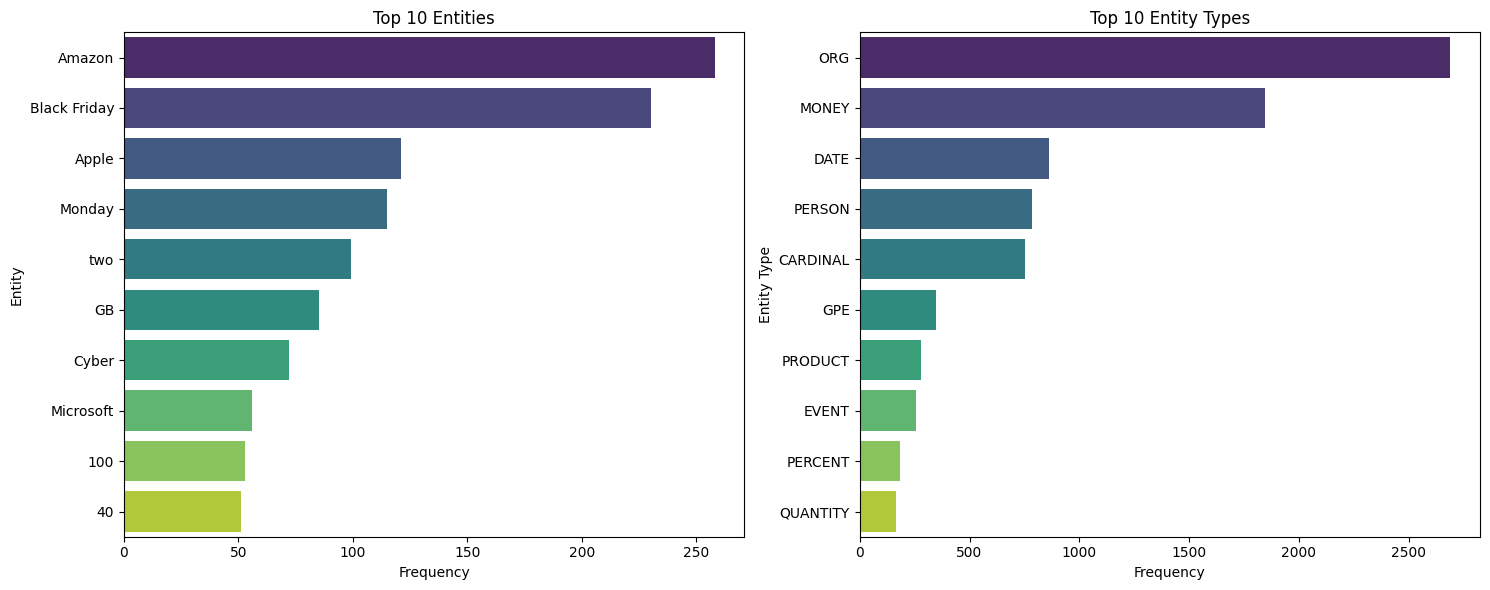

In [ ]:
import spacy
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from collections import Counter
import os

# Load Spacy NLP model
nlp = spacy.load('en_core_web_sm')

# Lists to store entities and entity types
all_entity_identified = []
all_entity_type = []

# Define the path to your text files
directory = '/content/drive/MyDrive/NER_files'

# Process each text file
for i in range(1, 21):
    filepath = os.path.join(directory, f"{i}.txt")
    with open(filepath, 'r', encoding='utf-8') as file:
        text = file.read()
        doc = nlp(text)
        for ent in doc.ents:
            all_entity_identified.append(ent.text)
            all_entity_type.append(ent.label_)

# Rest of your provided code for plotting
entity_freq = Counter(all_entity_identified)
entity_type_freq = Counter(all_entity_type)

# Convert to DataFrame for easier plotting
df_entity_freq = pd.DataFrame(entity_freq.items(), columns=['Entity', 'Frequency']).sort_values(by='Frequency', ascending=False)
df_entity_type_freq = pd.DataFrame(entity_type_freq.items(), columns=['Entity Type', 'Frequency']).sort_values(by='Frequency', ascending=False)

# Set up the matplotlib figure
plt.figure(figsize=(15, 6))

# Plot for Entity Frequency
plt.subplot(1, 2, 1)
sns.barplot(x='Frequency', y='Entity', data=df_entity_freq.head(10), palette='viridis')
plt.title('Top 10 Entities')
plt.xlabel('Frequency')
plt.ylabel('Entity')

# Plot for Entity Type Frequency
plt.subplot(1, 2, 2)
sns.barplot(x='Frequency', y='Entity Type', data=df_entity_type_freq.head(10), palette='viridis')
plt.title('Top 10 Entity Types')
plt.xlabel('Frequency')
plt.ylabel('Entity Type')

# Show the plots
plt.tight_layout()
plt.show()


# **Discussion & conclusion**
**Conclusion:**

I employed a structured database system to extract named entities related to Amazon and their corresponding labels. The entities were filtered based on labels such as people, organizations, locations, products, events, and dates, with the intention of focusing on the most relevant data categories.

Through data visualization of the top important topics and frequently mentioned words associated with Amazon, several noteworthy patterns emerged that align with the hypothesis I formulated. The hypothesis posited that certain entities and themes would consistently surface in Amazon-related news, reflecting the company's market strategies, public relations efforts, and societal impact.

The results confirmed the hypothesis, revealing that the most frequently mentioned entities in Amazon-related news include "Amazon" itself, "Black Friday," "Apple," "Monday," and others. These entities are closely associated with Amazon's business activities, including its marketing events and partnerships. Additionally, the frequency plot highlighting the top topics related to Amazon, encompassing organization, money, date, person, and more, underscores the success of the Named Entity Recognition (NER) analysis. It effectively captures the most crucial topics, such as trading activities, significant events, and individuals connected to the Amazon company.

**Discussion:**

By filtering these entities based on labels that encompassed people, organizations, locations, products, events, and dates, I ensured a more focused and meaningful exploration of the data.

The observed patterns in the data visualizations, which confirmed the hypothesis, are indicative of the recurrent themes and entities that permeate Amazon-related news. These findings suggest that Amazon's market presence and strategies, along with its engagement in significant events like "Black Friday," are subjects of continued interest and discussion within the media landscape. Moreover, the successful identification of key topics such as organization, money, and individuals associated with Amazon demonstrates the precision of the NER analysis.

One notable limitation of this research lies in the exclusive use of Named Entity Recognition (NER) without the incorporation of complementary techniques like sentiment analysis and topic modeling. While NER effectively identified and categorized named entities, it didn't account for the contextual relevance or sentiment associated with these entities, which could provide richer insights into Amazon's public perception and its impact on the market.

Furthermore, the analysis encountered a challenge in distinguishing between meaningful and non-meaningful entities. Certain words like "two," "GB," "100," and "40" were extracted as top frequent words related to Amazon, but they lack inherent significance in marketing trend analysis. These extraneous terms contributed to the inclusion of non-informative labels like "PERCENT" and "QUANTITY" in the top frequent topics. Without contextual understanding, it becomes challenging to derive actionable insights from these labels.

To enhance the research's depth and interpretability, future iterations could consider integrating sentiment analysis to gauge the sentiment associated with Amazon-related entities and incorporating topic modeling techniques to identify coherent themes within the data. This holistic approach would offer a more comprehensive understanding of both the quantitative and qualitative aspects of Amazon's presence in news and public discourse, ultimately contributing to a more nuanced analysis of its market strategies and societal impact.

**References Lists:**

Cheng, X., Bowden, M., Bhange, B. R., & Goyal, P. (2021). An End-to-End Solution for Named Entity Recognition in eCommerce Search. Proceedings of the AAAI Conference on Artificial Intelligence, 35(17), 15098-15106. https://doi.org/10.1609/aaai.v35i17.17773

Wen, M., Vasthimal, D. K., Lu, A., Wang, T., & Guo, A. (2019). Building Large-Scale Deep Learning System for Entity Recognition in E-Commerce Search. In BDCAT '19: Proceedings of the 6th IEEE/ACM International Conference on Big Data Computing, Applications and Technologies (pp. 149–154). IEEE/ACM. https://doi.org/10.1145/3365109.3368765
